<a href="https://colab.research.google.com/github/rsonar821/Aspiring-Minds-Employment-Outcome/blob/main/Aspiring_Minds_Employment_Outcome_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Innomatics/EDA 1 (Aspiring Minds)/aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##**Data Description**

1. ID (UID): A unique ID to identify a candidate
2. Salary (Continuous): Annual CTC oﬀered to the candidate (in INR)
3. DOJ (Date): Date of joining the company
4. DOL (Date): Date of leaving the company
5. Designation (Categorical): Designation oﬀered in the job
6. JobCity (Categorical): Location of the job (city)
7. Gender (Categorical): Candidate’s gender
8. DOB (Date): Date of birth of candidate
9. 10percentage (Continuous): Overall marks obtained in grade 10 examinations
10. 10board (Categorical): The school board whose curriculum the candidate followed in grade 10
11. 12graduation (Date): Year of graduation - senior year high school
12. 12percentage (Continuous): Overall marks obtained in grade 12 examinations
13. 12board (Date): The school board whose curriculum the candidate followed in grade 12
14. CollegeID (NA/ID): Unique ID identifying the college which the candidate attended
15. CollegeTier (Categorical): Tier of college
16. Degree (Categorical): Degree obtained/pursued by the candidate
17. Specialization (Categorical): Specialization pursued by the candidate
18. CollegeGPA (Continuous): Aggregate GPA at graduation
19. CollegeCityID (NA/ID): A unique ID to identify the city in which the college is located in
20. CollegeCityTier (Categorical): The tier of the city in which the college is located
21. CollegeState (Categorical): Name of States
22. GraduationYear (Date): Year of graduation (Bachelor’s degree)
23. English (Continuous): Scores in AMCAT English section
24. Logical (Continuous): Scores in AMCAT Logical section
25. Quant (Continuous): Scores in AMCAT Quantitative section
26. Domain (Continuous/Standardized): Scores in AMCAT’s domain module
27. ComputerProgramming (Continuous): Score in AMCAT’s Computer programming
section
28. ElectronicsAndSemicon (Continuous): Score in AMCAT’s Electronics & Semiconductor Engineering section
29. ComputerScience (Continuous): Score in AMCAT’s Computer Science section
30. MechanicalEngg (Continuous): Score in AMCAT’s Mechanical Engineering
section
31. ElectricalEngg (Continuous): Score in AMCAT’s Electrical Engineering section
32. TelecomEngg (Continuous): Score in AMCAT’s Telecommunication Engineering section
33. CivilEngg (Continuous): Score in AMCAT’s Civil Engineering section
34. conscientiousness (Continuous/ Standardized): Scores in one of the sections of AMCAT’s personality test
35. agreeableness (Continuous/Standardized): Scores in one of the sections of AMCAT’s personality test
36. extraversion (Continuous/ Standardized): Scores in one of the sections of AMCAT’s personality test
37. neuroticism (Continuous/Standardized): Scores in one of the sections of AMCAT’s personality test
38. openess_to_experience (Continuous/ Standardized): Scores in one of the sections of AMCAT’s personality test



In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [8]:
df.shape

(3998, 38)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

**There are no null values in the dataset**

In [11]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [13]:
df['DOB']=pd.to_datetime(df['DOB'])
df['DOB']=df['DOB'].dt.year

df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOJ']=df['DOJ'].dt.year

In [14]:
df['DOL'] = np.where(df['DOL']=='present', 2015, df['DOL'])

In [15]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012,2015,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013,2015,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014,2015,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011,2015,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014,2015-03-01 00:00:00,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# **Univariate Analysis**

In [16]:
def stat(col_name):
  print(f'The mean of {col_name} is {round(df[col_name].mean(), 2)}')
  print(f'The median of {col_name} is {df[col_name].median()}')

In [17]:
def continuous_analysis(col_name):
  print(f"The unique {col_name} of students is \n \n {df[col_name].unique()}")
  print('-'*150)

  print(f"The number of unique {col_name} are \n {df[col_name].nunique()}")
  print('-'*150)

  fig = sns.boxplot(df[col_name])
  fig.set_title(f'Boxplot of {col_name}')
  plt.show(fig)
  print('-'*150)

  df[col_name].plot.density(color='blue')
  plt.title(f'Probability Density Plot of {col_name}')
  plt.show()
  print('-'*150)

  fig = sns.distplot(df[col_name])
  fig.set_title(f'Distribution Plot of {col_name}')
  plt.show(fig)
  print('-'*150)

  stat(col_name)

  q3 = df[col_name].quantile(0.75)  
  q1 = df[col_name].quantile(0.25)  
  IQR = q3 - q1
  lower_limit = q1 - (IQR * 1.5)
  upper_limit = q3 + (IQR * 1.5)
  df[col_name] = np.where(df[col_name]> upper_limit, upper_limit, np.where(df[col_name]< lower_limit, lower_limit,df[col_name]))

  fig = sns.boxplot(df[col_name])
  fig.set_title(f'Boxplot of {col_name} after capping outliers')
  plt.show(fig)
  print('-'*150)

  df[col_name].plot.density(color='blue')
  plt.title(f'Probability Density Plot of {col_name} after capping outliers')
  plt.show()
  print('-'*150)

  fig = sns.distplot(df[col_name])
  fig.set_title(f'Distribution Plot of {col_name} after capping outliers')
  plt.show(fig)
  print('-'*150)

  stat(col_name)

###**Salary**

The unique Salary of students is 
 
 [ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  910000  5700

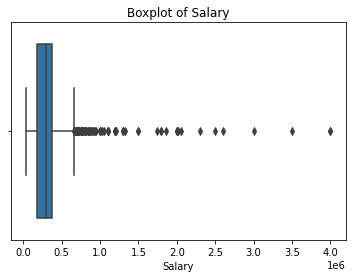

------------------------------------------------------------------------------------------------------------------------------------------------------


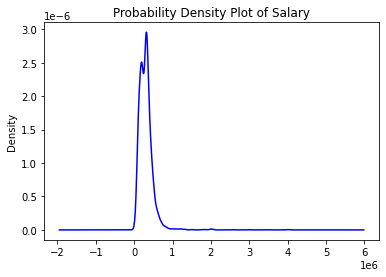

------------------------------------------------------------------------------------------------------------------------------------------------------


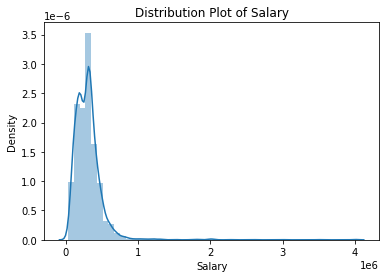

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Salary is 307699.85
The median of Salary is 300000.0


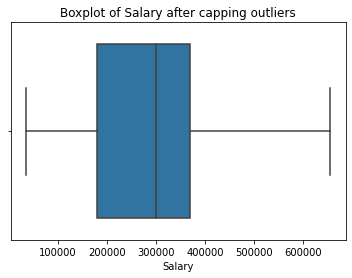

------------------------------------------------------------------------------------------------------------------------------------------------------


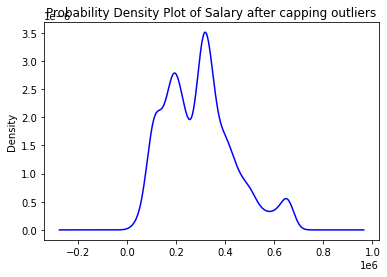

------------------------------------------------------------------------------------------------------------------------------------------------------


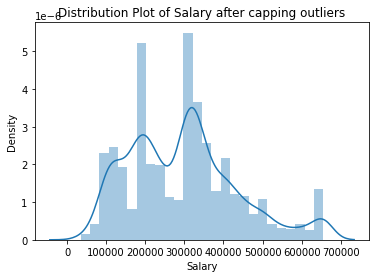

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Salary is 295522.51
The median of Salary is 300000.0


In [18]:
continuous_analysis('Salary')

###**10percentage**

The unique 10percentage of students is 
 
 [84.3  85.4  85.   85.6  78.   89.92 86.08 92.   90.   77.   88.6  81.
 83.6  60.8  81.2  69.54 85.8  65.   79.   91.2  75.67 92.5  70.   88.
 86.8  90.88 76.8  84.   64.   77.2  87.   73.   71.   91.5  52.33 66.6
 75.   91.4  59.   84.5  95.8  69.6  86.6  81.92 66.5  80.   85.2  89.25
 58.4  90.8  89.88 63.3  72.   83.   85.3  60.66 89.37 84.4  89.   86.
 70.6  93.44 76.   86.4  84.83 72.3  69.   73.33 86.16 56.   79.25 88.66
 80.8  81.16 83.5  55.6  84.6  62.   68.4  51.   79.6  63.4  86.53 76.18
 91.43 76.17 82.4  58.   90.04 60.4  74.23 59.8  82.3  84.2  60.   82.8
 82.6  74.   89.8  88.67 64.66 77.8  89.5  64.56 91.12 73.08 78.33 81.33
 89.7  87.4  92.66 76.87 91.3  77.9  76.2  77.78 65.6  65.8  67.75 91.6
 78.66 78.4  61.   90.4  58.6  82.2  82.   90.1  86.17 83.89 76.7  88.2
 80.6  91.   74.4  79.28 84.96 92.8  79.4  66.8  79.8  65.3  94.6  83.33
 80.83 67.23 86.2  55.   86.62 69.13 89.12 87.5  66.4  80.33 75.2  50.6
 81.1  60.14 78.83 

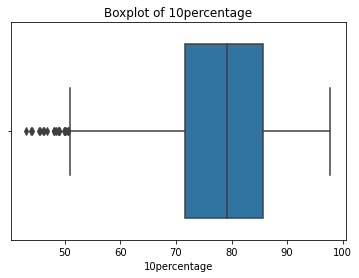

------------------------------------------------------------------------------------------------------------------------------------------------------


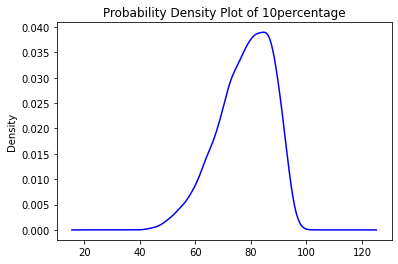

------------------------------------------------------------------------------------------------------------------------------------------------------


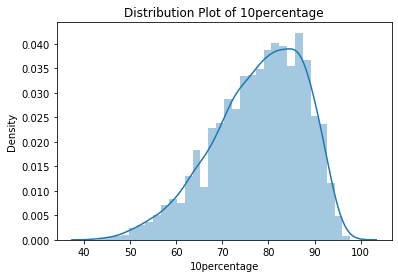

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of 10percentage is 77.93
The median of 10percentage is 79.15


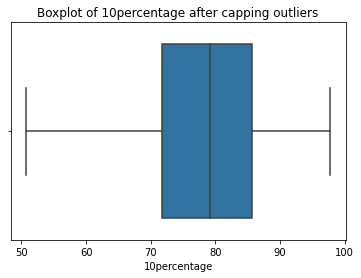

------------------------------------------------------------------------------------------------------------------------------------------------------


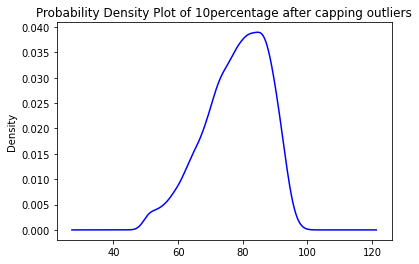

------------------------------------------------------------------------------------------------------------------------------------------------------


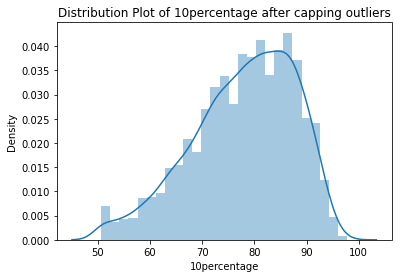

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of 10percentage is 77.94
The median of 10percentage is 79.15


In [19]:
continuous_analysis('10percentage')

The unique 12percentage of students is 
 
 [95.8  85.   68.2  83.6  76.8  87.   67.5  91.   91.2  72.2  83.7  86.
 69.83 62.4  79.9  64.43 74.8  66.66 64.8  62.2  84.63 74.4  95.2  43.42
 90.   82.8  82.5  83.   68.   74.   92.   86.1  84.4  68.4  61.   93.8
 85.4  67.   89.66 68.6  60.   73.   87.7  87.16 82.   71.4  75.   61.46
 49.5  72.5  81.5  78.   90.1  70.1  95.4  61.1  49.   79.   88.3  77.8
 94.4  86.67 73.2  64.   77.   78.67 72.   78.2  95.   82.4  60.2  62.6
 70.   71.33 70.08 56.   80.   84.33 87.9  65.   68.5  94.2  66.   88.
 76.6  50.8  66.5  76.4  65.8  48.   63.   71.55 86.33 71.3  57.6  83.4
 75.16 77.77 60.25 89.6  86.4  80.4  59.   73.6  63.6  66.6  86.8  79.6
 87.58 81.4  89.   62.   47.   77.2  71.2  54.   67.6  91.9  63.1  69.
 68.46 85.2  78.4  82.2  95.6  81.33 88.9  82.75 72.6  66.67 70.2  61.5
 70.6  79.4  61.8  95.5  80.7  60.4  77.14 75.2  81.2  80.8  88.88 83.9
 65.2  83.1  80.6  70.16 90.91 84.7  68.55 59.16 78.83 59.9  75.6  87.8
 79.2  80.3  82.1  65.

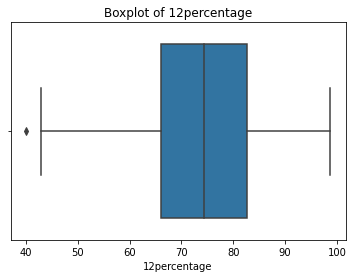

------------------------------------------------------------------------------------------------------------------------------------------------------


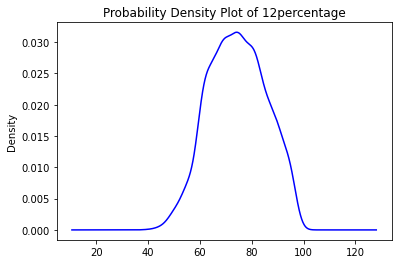

------------------------------------------------------------------------------------------------------------------------------------------------------


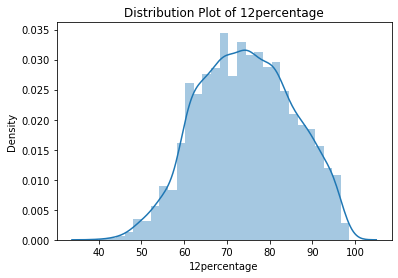

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of 12percentage is 74.47
The median of 12percentage is 74.4


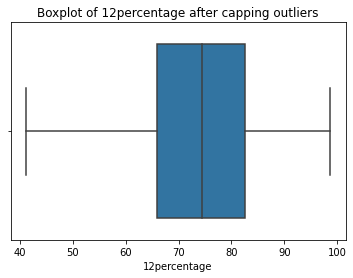

------------------------------------------------------------------------------------------------------------------------------------------------------


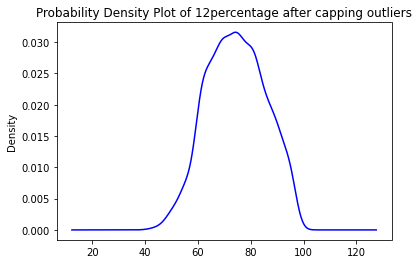

------------------------------------------------------------------------------------------------------------------------------------------------------


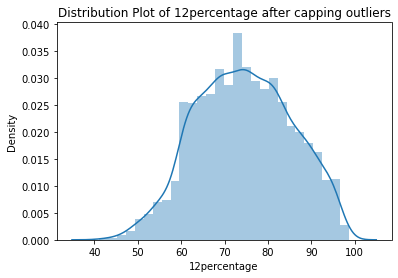

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of 12percentage is 74.47
The median of 12percentage is 74.4


In [20]:
continuous_analysis('12percentage')

The unique collegeGPA of students is 
 
 [78.   70.06 70.   ... 65.05 74.73 70.42]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique collegeGPA are 
 1282
------------------------------------------------------------------------------------------------------------------------------------------------------


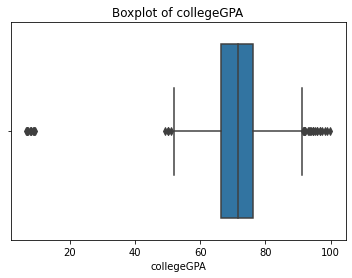

------------------------------------------------------------------------------------------------------------------------------------------------------


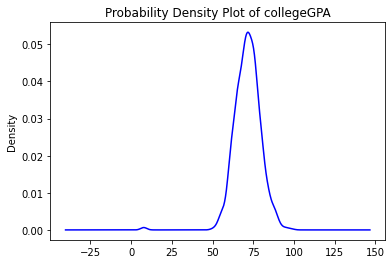

------------------------------------------------------------------------------------------------------------------------------------------------------


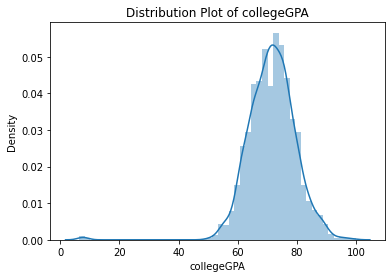

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of collegeGPA is 71.49
The median of collegeGPA is 71.72


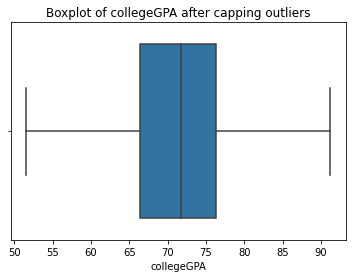

------------------------------------------------------------------------------------------------------------------------------------------------------


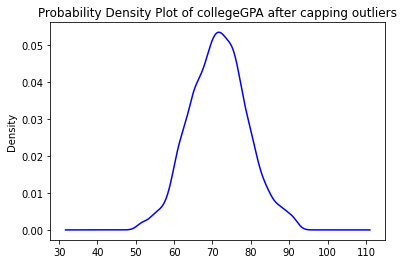

------------------------------------------------------------------------------------------------------------------------------------------------------


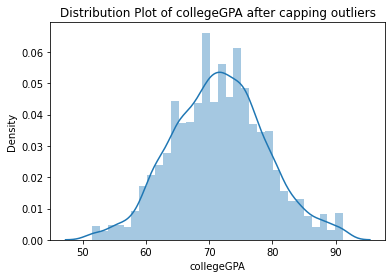

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of collegeGPA is 71.6
The median of collegeGPA is 71.72


In [21]:
continuous_analysis('collegeGPA')

The unique English of students is 
 
 [515 695 615 635 545 560 590 605 565 495 380 395 485 685 465 455 385 370
 625 575 415 535 580 475 570 430 450 510 425 555 300 505 440 525 420 640
 444 630 665 675 325 405 375 315 710 345 250 350 275 360 265 595 585 520
 500 735 765 335 490 660 355 530 365 655 730 445 720 645 650 875 534 454
 544 295 285 435 464 705 554 745 280 825 290 715 310 215 700 870 305 524
 755 790 800 205 725 780 404 770 805 180 830 795 255 324 775 394 240 225
 850 684 334]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique English are 
 111
------------------------------------------------------------------------------------------------------------------------------------------------------


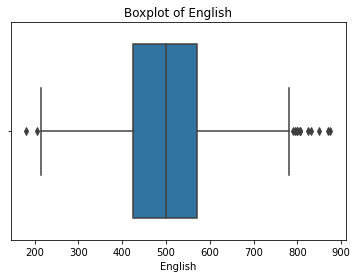

------------------------------------------------------------------------------------------------------------------------------------------------------


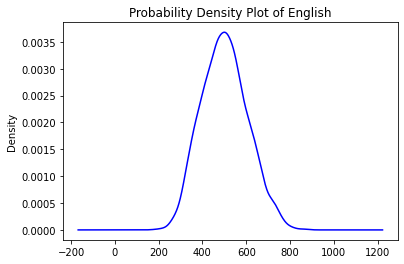

------------------------------------------------------------------------------------------------------------------------------------------------------


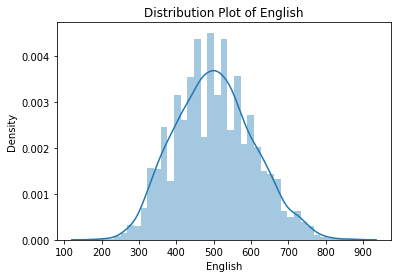

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of English is 501.65
The median of English is 500.0


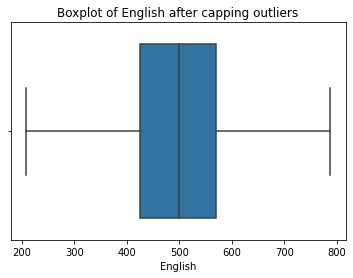

------------------------------------------------------------------------------------------------------------------------------------------------------


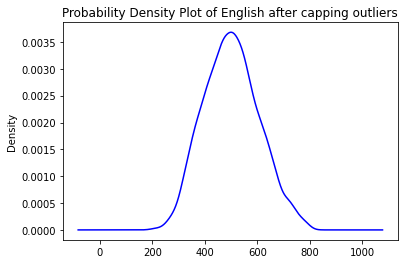

------------------------------------------------------------------------------------------------------------------------------------------------------


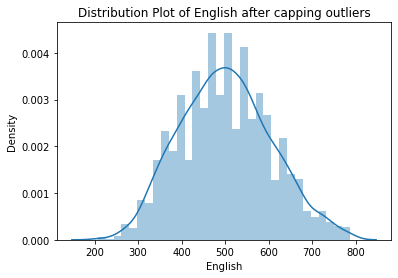

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of English is 501.55
The median of English is 500.0


In [22]:
continuous_analysis('English')

The unique Logical of students is 
 
 [585 610 545 625 555 435 670 565 455 605 580 425 520 530 495 445 535 360
 335 510 570 375 405 485 475 525 640 595 560 340 395 415 465 505 385 460
 410 500 645 480 355 450 440 470 255 305 590 630 365 350 325 400 205 655
 295 345 390 665 515 540 680 245 620 420 575 635 554 315 615 215 370 300
 274 685 324 675 650 464 684 275 334 544 454 534 404 795 285 715 700 674
 690 695 394 270 705 310 490 330 280 735 380 290 265 240 195 235 660]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique Logical are 
 107
------------------------------------------------------------------------------------------------------------------------------------------------------


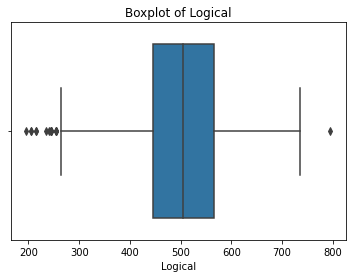

------------------------------------------------------------------------------------------------------------------------------------------------------


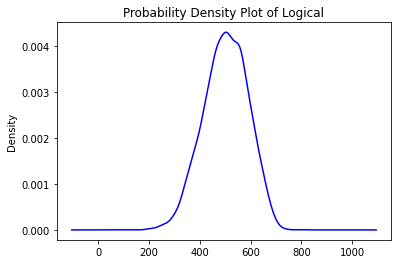

------------------------------------------------------------------------------------------------------------------------------------------------------


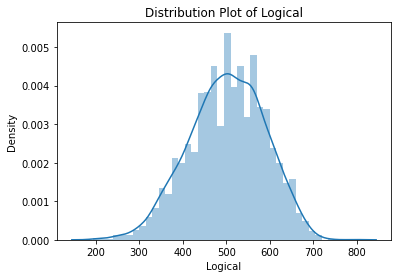

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Logical is 501.6
The median of Logical is 505.0


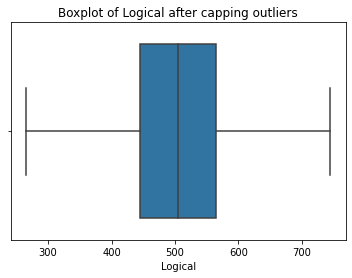

------------------------------------------------------------------------------------------------------------------------------------------------------


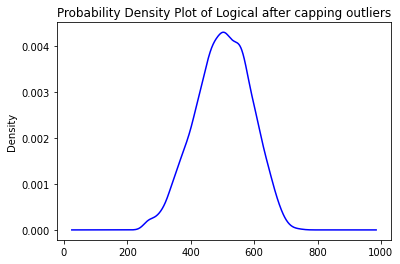

------------------------------------------------------------------------------------------------------------------------------------------------------


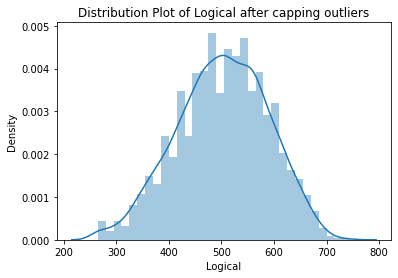

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Logical is 501.71
The median of Logical is 505.0


In [23]:
continuous_analysis('Logical')

The unique Quant of students is 
 
 [525 780 370 625 465 620 380 590 530 545 565 715 470 645 355 515 435 445
 485 270 630 575 405 605 385 695 450 295 430 415 635 475 460 825 500 455
 554 595 495 665 250 310 325 390 510 535 340 440 705 534 400 395 570 750
 330 320 454 365 615 505 425 235 210 585 810 555 735 560 524 690 870 765
 675 520 655 305 725 840 650 375 720 265 280 464 404 800 680 260 674 760
 345 335 165 685 544 215 180 795 200 860 334 285 514 195 494 214 275 315
 324 175 684 225 740 805 444 410 135 255 220 755 855 145 245 885 120 900
 794 775 745 504 820 150 710 190 185 155 580 394]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique Quant are 
 138
------------------------------------------------------------------------------------------------------------------------------------------------------


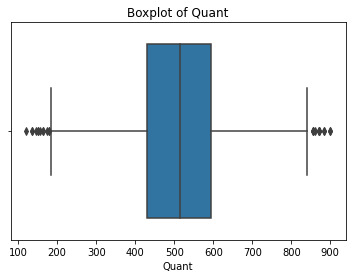

------------------------------------------------------------------------------------------------------------------------------------------------------


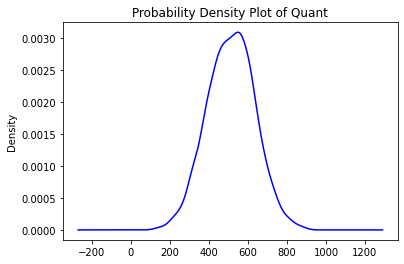

------------------------------------------------------------------------------------------------------------------------------------------------------


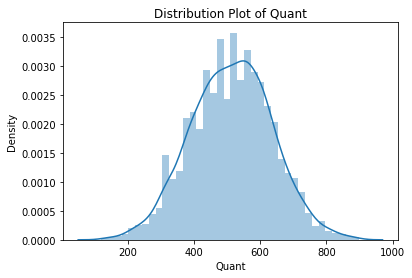

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Quant is 513.38
The median of Quant is 515.0


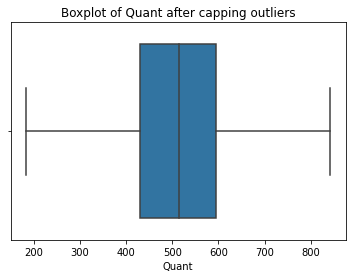

------------------------------------------------------------------------------------------------------------------------------------------------------


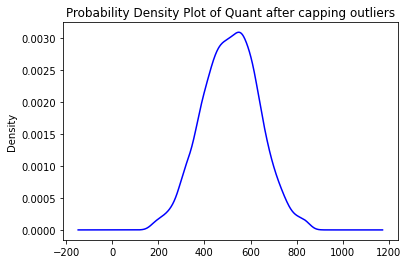

------------------------------------------------------------------------------------------------------------------------------------------------------


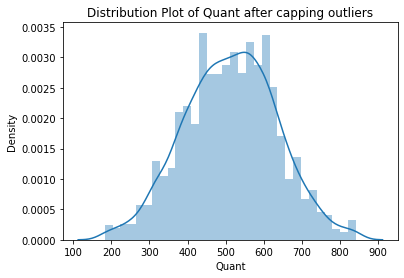

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of Quant is 513.36
The median of Quant is 515.0


In [24]:
continuous_analysis('Quant')

The unique ComputerProgramming of students is 
 
 [445  -1 395 615 645 405 735 385 485 605 495 355 515 545 425 525 455 475
 565 535 335 345 465 415 435 155 375 555 305 315 804 285 575 505 195 225
 595 275 334 365 685 655 625 585 665 325 235 255 205 494 695 635 215 464
 295 394 245 715 265 135 105 524 165 175 125 675 454 745 185 214 145 544
 725 840 404 755 705 115 554]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique ComputerProgramming are 
 79
------------------------------------------------------------------------------------------------------------------------------------------------------


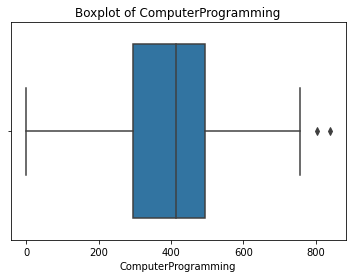

------------------------------------------------------------------------------------------------------------------------------------------------------


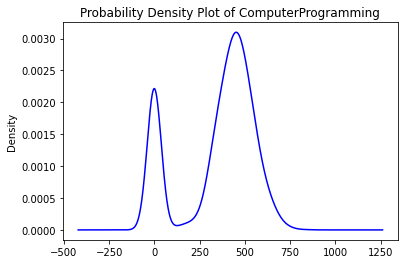

------------------------------------------------------------------------------------------------------------------------------------------------------


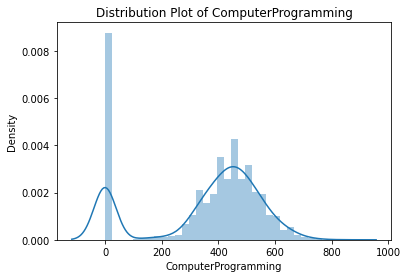

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of ComputerProgramming is 353.1
The median of ComputerProgramming is 415.0


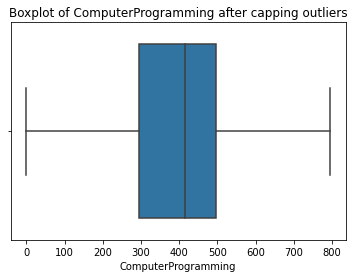

------------------------------------------------------------------------------------------------------------------------------------------------------


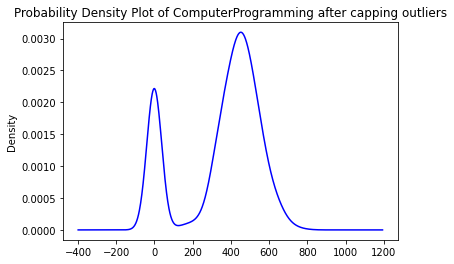

------------------------------------------------------------------------------------------------------------------------------------------------------


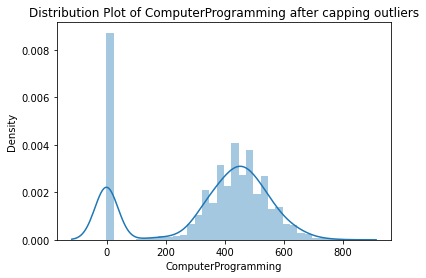

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of ComputerProgramming is 353.09
The median of ComputerProgramming is 415.0


In [25]:
continuous_analysis('ComputerProgramming')

**There could be discrepancy seen in the data as there are values -1, which could be that a person was absent for the exam or failed the exam, so we can replace the -1 with 0**

In [26]:
df['ComputerProgramming'] = np.where(df['ComputerProgramming']==-1, 0, df['ComputerProgramming'])

The unique ElectronicsAndSemicon of students is 
 
 [ -1 466 233 366 324 266 333 356 420 260 228 388 300 292 433 196 200 164
 400 484 500 452 516 166 533 566 612 133 548]
------------------------------------------------------------------------------------------------------------------------------------------------------
The number of unique ElectronicsAndSemicon are 
 29
------------------------------------------------------------------------------------------------------------------------------------------------------


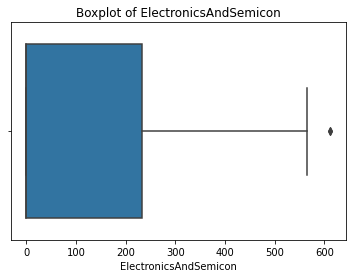

------------------------------------------------------------------------------------------------------------------------------------------------------


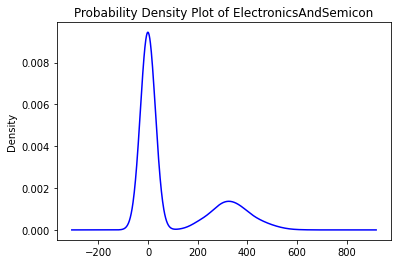

------------------------------------------------------------------------------------------------------------------------------------------------------


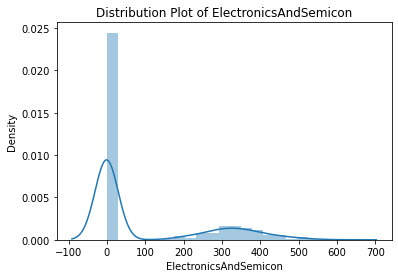

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of ElectronicsAndSemicon is 95.33
The median of ElectronicsAndSemicon is -1.0


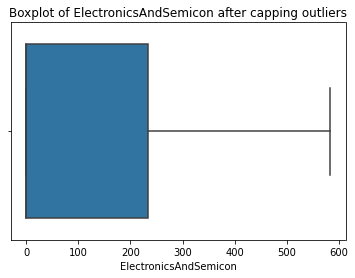

------------------------------------------------------------------------------------------------------------------------------------------------------


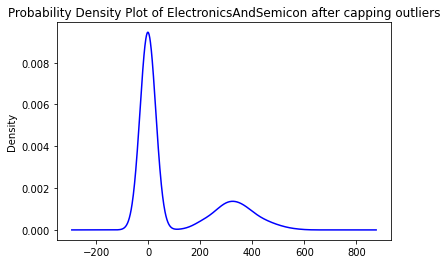

------------------------------------------------------------------------------------------------------------------------------------------------------


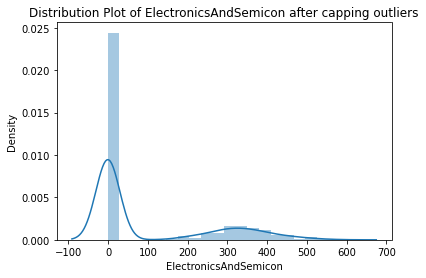

------------------------------------------------------------------------------------------------------------------------------------------------------
The mean of ElectronicsAndSemicon is 95.31
The median of ElectronicsAndSemicon is -1.0


In [27]:
continuous_analysis('ElectronicsAndSemicon')

In [28]:
df['ElectronicsAndSemicon'] = np.where(df['ElectronicsAndSemicon']==-1, 0, df['ElectronicsAndSemicon'])
df['ComputerScience'] = np.where(df['ComputerScience']==-1, 0, df['ComputerScience'])
df['MechanicalEngg'] = np.where(df['MechanicalEngg']==-1, 0, df['MechanicalEngg'])
df['ElectricalEngg'] = np.where(df['ElectricalEngg']==-1, 0, df['ElectricalEngg'])
df['TelecomEngg'] = np.where(df['TelecomEngg']==-1, 0, df['TelecomEngg'])
df['CivilEngg'] = np.where(df['CivilEngg']==-1, 0, df['CivilEngg'])

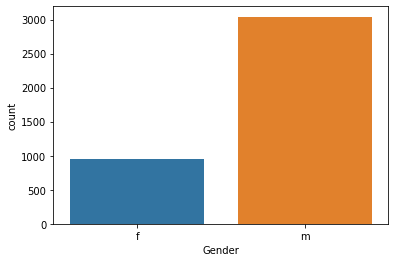

In [29]:
sns.countplot('Gender', data=df)

**Number of males in the dataset are more than females**

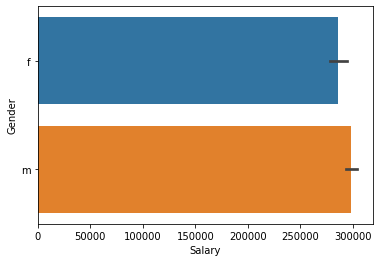

In [30]:
figure = sns.barplot(x='Salary', y = 'Gender', data=df)
plt.show(figure)

**Males earn more salary than females**

In [32]:
board_12_df = pd.DataFrame(df['12board'].value_counts().head(10).reset_index())
board_12_df.drop(df.index[2], inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

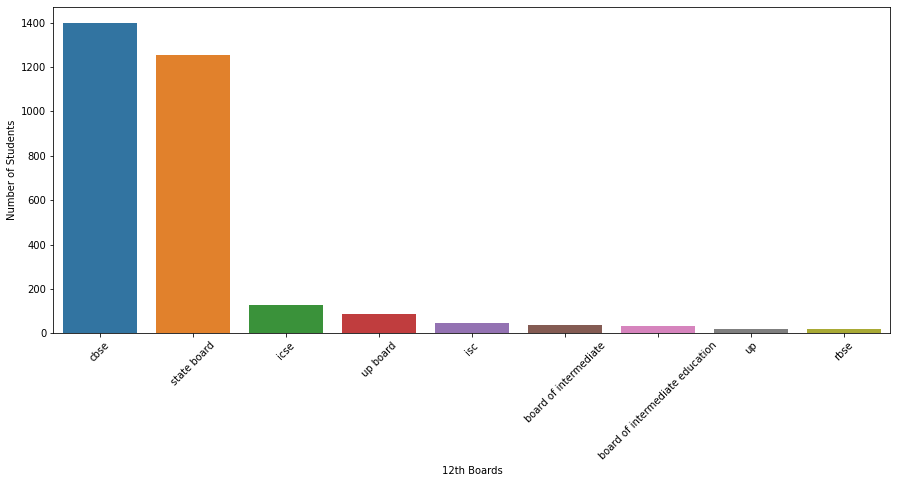

In [33]:
plt.figure(figsize=(15, 6))
figure = sns.barplot(x='index', y='12board', data=board_12_df)
figure.set(xlabel='12th Boards', ylabel='Number of Students')
plt.xticks(rotation=45)

**Students passing out their 12th standard from CBSE are maximum**

In [34]:
board12_salary = pd.DataFrame(df.groupby('12board')['Salary'].mean().reset_index())
board12_salary = board12_salary.sort_values('Salary', ascending=False).head(5)

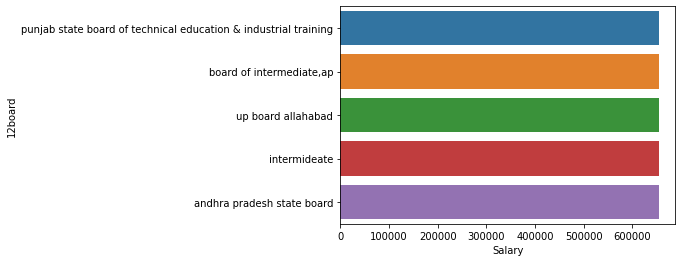

In [35]:
sns.barplot(x='Salary', y='12board', data=board12_salary)

**Students from the above 5 boards of 12th standard earn the maximum salary**

In [36]:
board_10_df = pd.DataFrame(df['10board'].value_counts().head(10).reset_index())
board_10_df.drop(df.index[2], inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

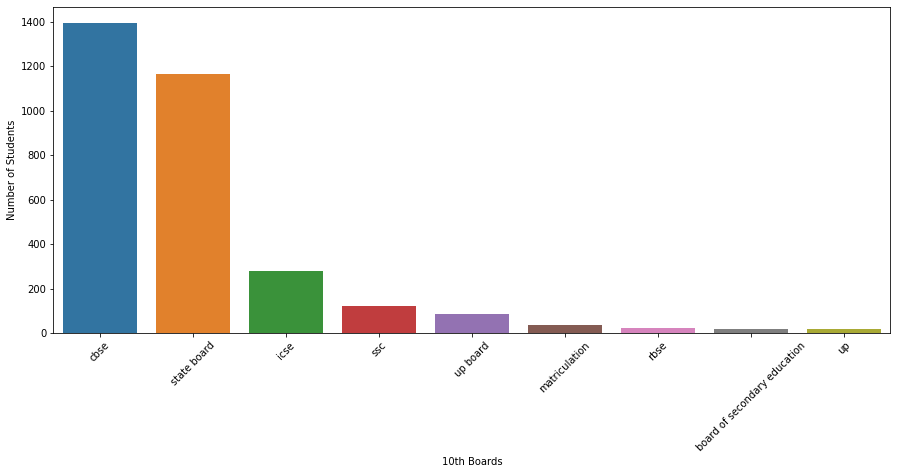

In [37]:
plt.figure(figsize=(15, 6))
figure = sns.barplot(x='index', y='10board', data=board_10_df)
figure.set(xlabel='10th Boards', ylabel='Number of Students')
plt.xticks(rotation=45)

**Students passing out their 10th standard from CBSE are maximum**

In [38]:
board10_salary = pd.DataFrame(df.groupby('10board')['Salary'].mean().reset_index())
board10_salary = board10_salary.sort_values('Salary', ascending=False).head(5)

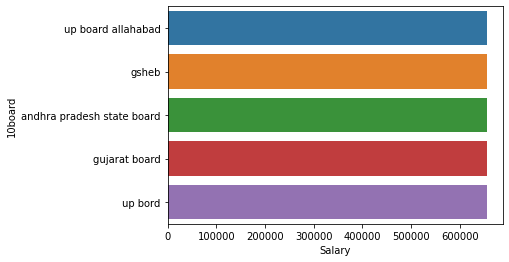

In [39]:
sns.barplot(x='Salary', y='10board', data=board10_salary)

**Students from the above 5 boards of 10th standard earn the maximum salary**

In [40]:
drop_cols = ['DOB', 'DOJ', 'DOL', 'CollegeCityID', 'CollegeID']
df.drop(drop_cols, axis=1, inplace=True)

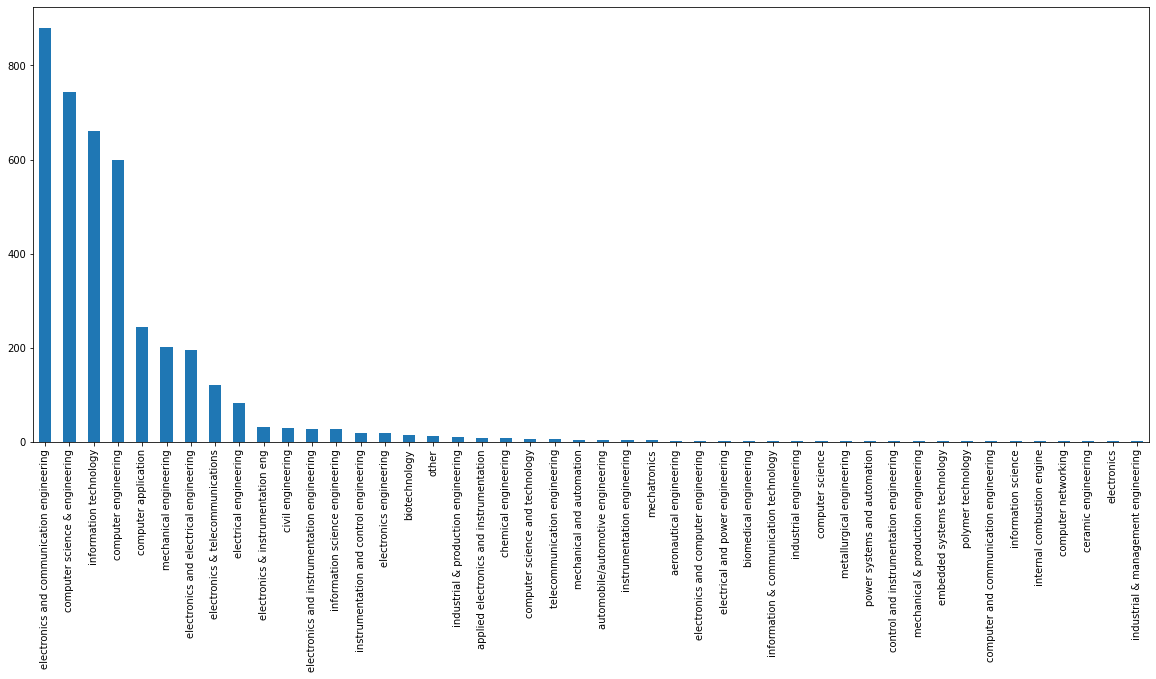

In [41]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(20, 8))

**The top 5 specializations opted by students is E&TC, CSE, IT, computer engineering and computer application** 

In [42]:
spe_salary = df.groupby('Specialization')['Salary'].mean().reset_index()
spe_salary = spe_salary.sort_values('Salary', ascending=True).head(5)

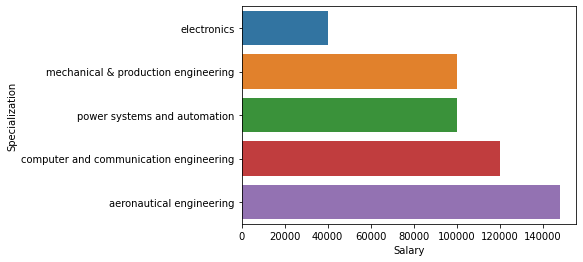

In [43]:
sns.barplot(x='Salary', y='Specialization', data=spe_salary)

**Salary of aeronautical engineer is the highest followed by computer and communication engineer**

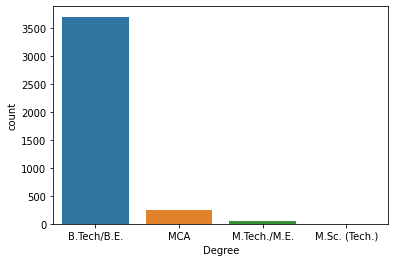

In [44]:
sns.countplot(df['Degree'])

**Maximum students opt for B.Tech or B.E. after their 12th standard**

In [45]:
des_salary = df.groupby('Designation')['Salary'].mean().reset_index()
des_salary = des_salary.sort_values('Salary', ascending=True).head(5)

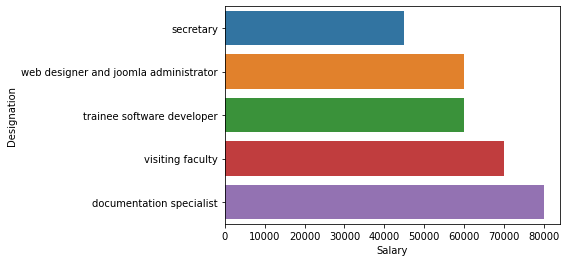

In [46]:
sns.barplot(x='Salary', y='Designation', data=des_salary)

**Maximum students have their designation as document specialist**

In [48]:
subjects = ['English','Logical','Quant','Domain','ComputerProgramming',
            'ElectronicsAndSemicon','ComputerScience','MechanicalEngg',
            'ElectricalEngg','TelecomEngg','CivilEngg',]

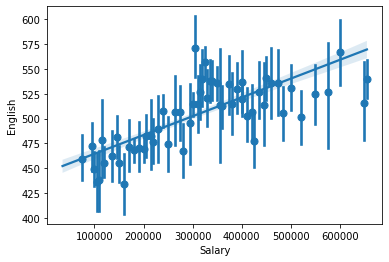

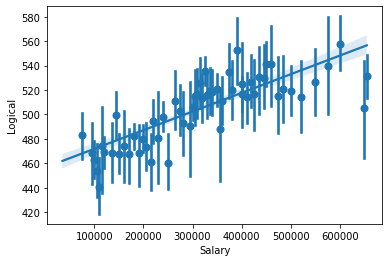

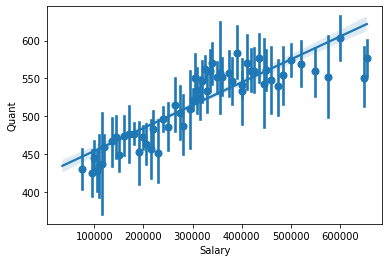

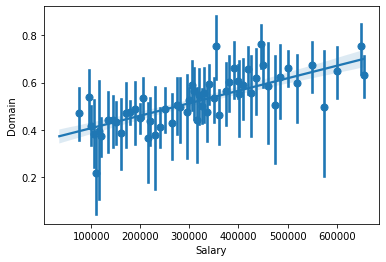

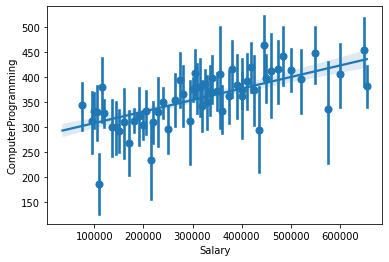

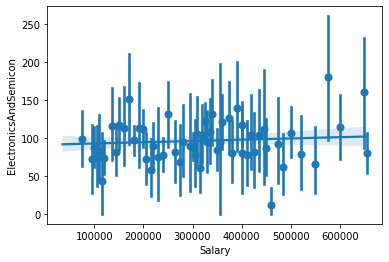

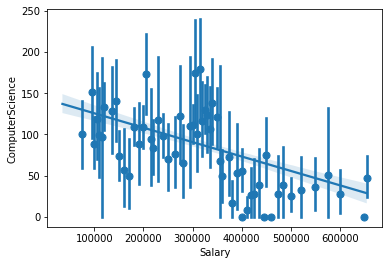

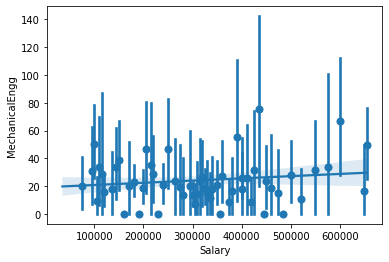

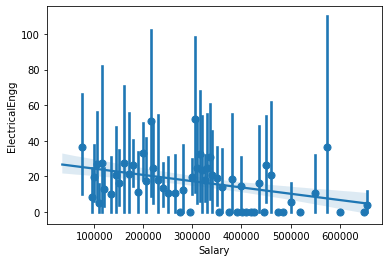

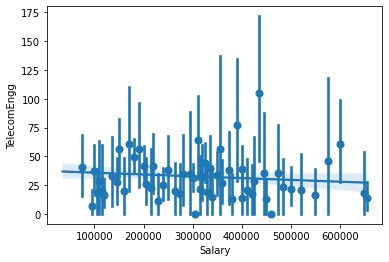

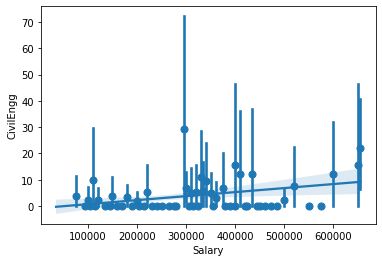

In [52]:
for i in subjects:
  figure = sns.regplot(x='Salary', y=i, data=df, x_bins=100)
  plt.show(figure)

**In most of the subjects it can be seen that as the marks are increasing the salary is also increasing**

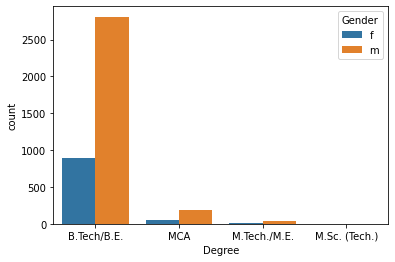

In [54]:
sns.countplot(x=df['Degree'], hue=df['Gender'])

**Males enroll more in any kind of degree**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

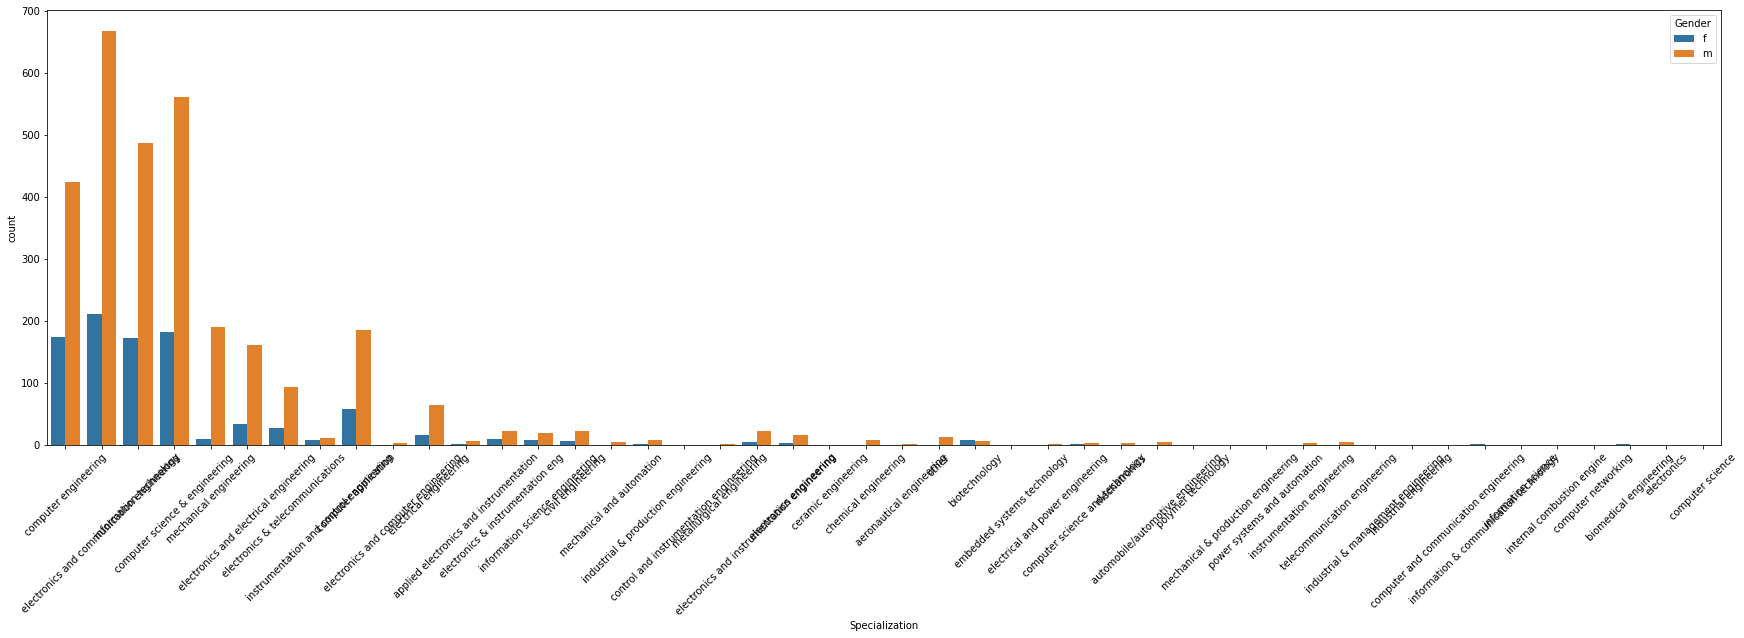

In [57]:
plt.figure(figsize=(30, 8))
sns.countplot(x=df['Specialization'], hue=df['Gender'])
plt.xticks(rotation=45)

**It can be observed that males are enrolling more in number in any specialization**